# Power load estimation

In [3]:
%matplotlib notebook
import matplotlib.pylab as plt
import numpy as np
from sklearn.decomposition import PCA
from scipy.io import loadmat
import pandas as pd
from sklearn import neural_network
from sklearn import linear_model
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.model_selection import KFold

Import the data

In [4]:
#import the mat file from the folder
filename = "datasets/powerTrainData.mat"

#load the mat files
mat = loadmat(filename)

#assign to variables the imported data
Xtrain = mat["powerTrainInput"].T
Ytrain = mat["powerTrainOutput"].reshape(len(Xtrain))
Xdate = mat["powerTrainDate"].T
Xtest = mat["powerTestInput"].T

print("Xtrain size", Xtrain.shape)
print("Xtrain", Xtrain[:,10])
print("Ytrain size", Ytrain.shape)
print("Xdate size", Xdate.shape)
print("Xdate data", Xdate[1:10,:])
print("Xtest size", Xtest.shape)

Xtrain size (844, 15)
Xtrain [ 10.78  48.92  83.76  66.07  33.22  12.7   30.13  30.44  20.66  59.45
 107.93  48.93  17.14  32.55  66.02  29.98  47.54  24.46  43.7   17.65
  27.41  18.67  18.74   9.65  35.33  92.84  36.41  61.06  13.53  32.4
  39.83  35.54  30.68  14.68  66.17  67.13  81.28  14.92  84.05  41.14
  13.75  67.77  21.28  81.54  25.26  44.07  12.2   25.06  55.45  25.96
  87.69  17.97  18.65  19.25  13.41  57.16  19.29  18.14   7.95  71.7
  69.5   74.49  46.05  33.2   32.61  10.72  90.18  14.63  33.9   35.7
  19.61  28.21  31.34   7.59  59.89  64.69  31.22  37.56  36.15  72.2
  36.35  32.73  11.73 123.01  23.9   27.14  19.15  92.37  17.11  68.85
  64.55  30.26  89.04  23.6   49.44  12.55  11.81  44.93  47.77  53.55
  18.82  39.56  18.93 103.99  69.28  45.69  33.35   9.19  44.31  31.38
  82.35  20.75  38.02  68.99  97.91  26.93 101.33  13.99  50.53  87.52
  54.53  99.16  13.44  73.82  52.21  35.02  33.63  26.89  65.49  35.64
  74.19  45.16  38.15  27.47  78.56  62.11  44.8   1

Since all the data features is handpicked, all features needs to be used.

<IPython.core.display.Javascript object>


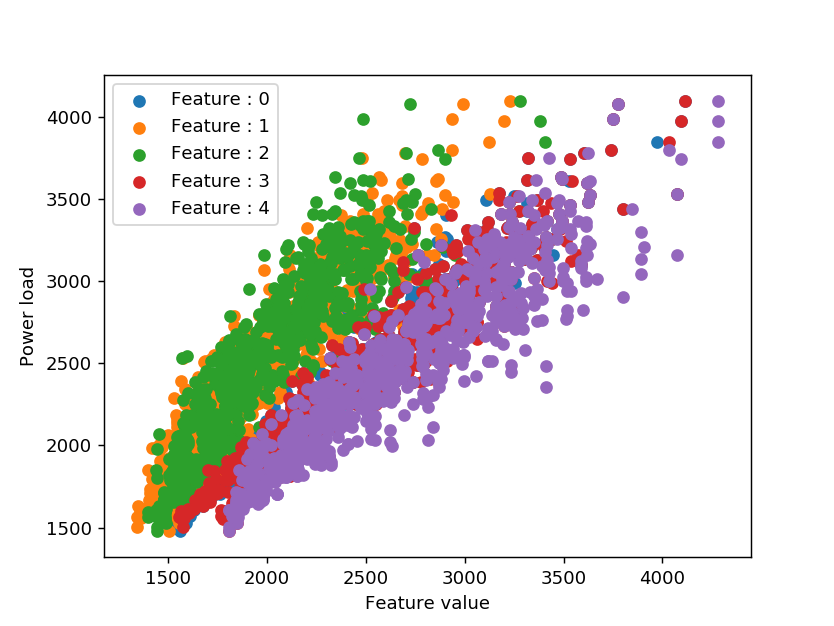

<IPython.core.display.Javascript object>


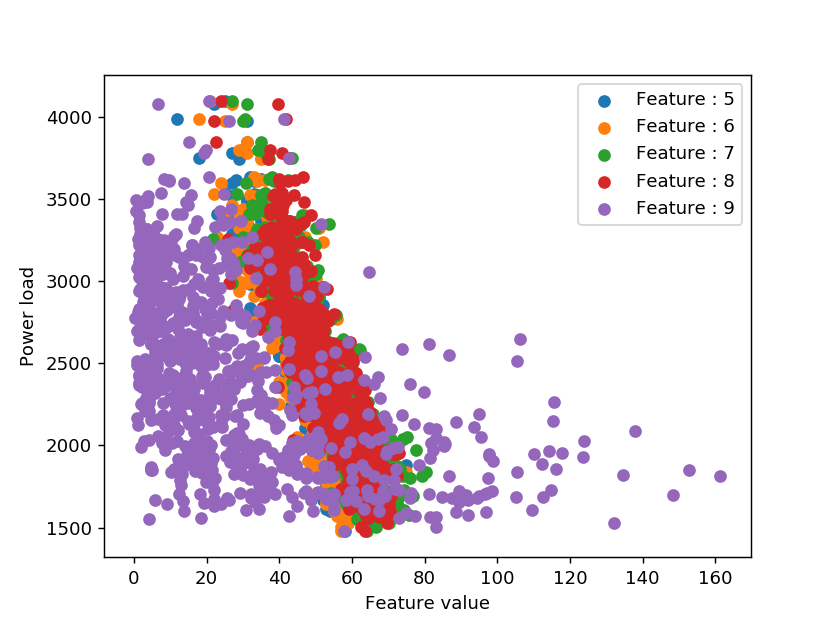

<IPython.core.display.Javascript object>


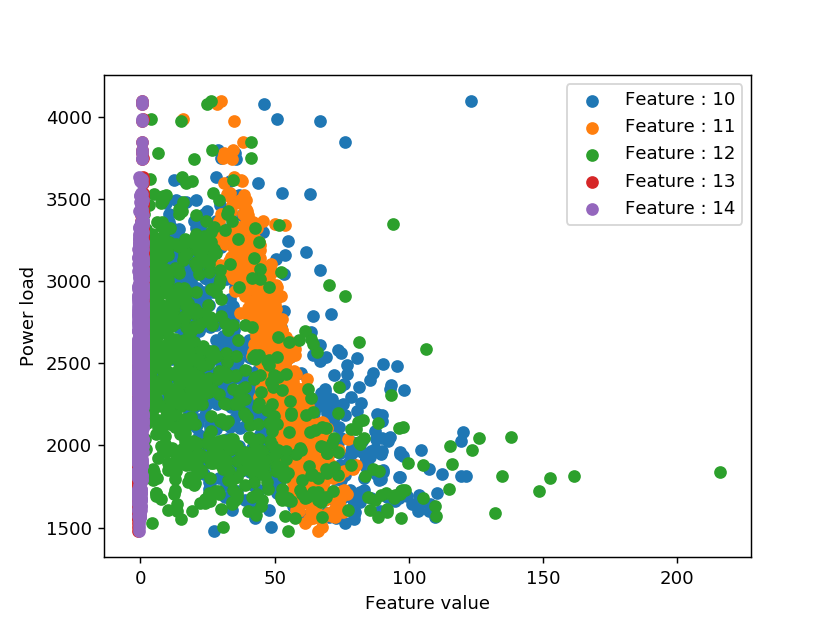

In [5]:
# plot the y data
plt.figure()
for i in range(0,5):
    plt.scatter(Xtrain[:,i:i +1], Ytrain, label='Feature : %d'%(i))
plt.xlabel("Feature value")
plt.ylabel("Power load")
plt.legend()
plt.show()
plt.figure()
for i in range(5,10):
    plt.scatter(Xtrain[:,i:i +1], Ytrain, label='Feature : %d'%(i))
plt.xlabel("Feature value")
plt.ylabel("Power load")
plt.legend()
plt.show()
plt.figure()
for i in range(10,15):
    plt.scatter(Xtrain[:,i:i +1], Ytrain, label='Feature : %d'%(i))
plt.xlabel("Feature value")
plt.ylabel("Power load")
plt.legend()
plt.show()

Normalize the data

In [4]:
#set 5 fold CV
kf = 10

<IPython.core.display.Javascript object>


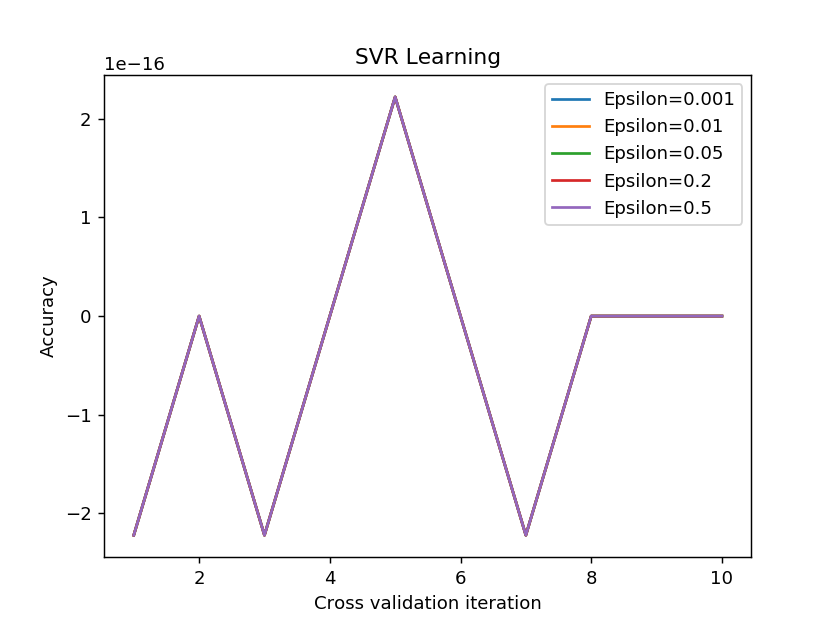

Optimal C 0.001
Max mean accuracy -4.4408920985006264e-17


<IPython.core.display.Javascript object>


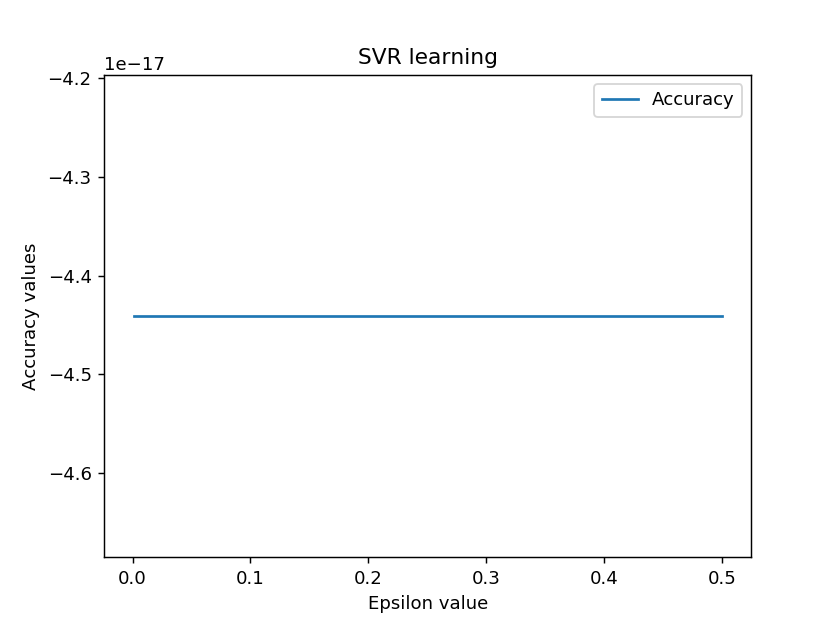

In [5]:
#use svm svr
from sklearn.svm import SVR
epsilon_n = [.001, .01 , .05, 0.2, 0.5]
mean_accuracy = []
plt.figure()
for epsilon in epsilon_n:
    svr = SVR(kernel='rbf', C=1, gamma='auto', degree=3, epsilon=epsilon, coef0=1)
    scores_svr = cross_val_score(svr, Xtrain, Ytrain, cv=kf,scoring='explained_variance')
    mean_accuracy.append(scores_svr.mean())
    plt.plot(range(1, len(scores_svr)+1),scores_svr, label='Epsilon=%s'%epsilon)
plt.ylabel("Accuracy")
plt.xlabel("Cross validation iteration")
plt.title("SVR Learning")
plt.legend()
plt.show

#find the maximum accuracy and the corresponding number of hidden layers
max_accuracy = max(mean_accuracy)
optimal_epsilon = epsilon_n[mean_accuracy.index(max_accuracy)]
print("Optimal C", optimal_epsilon)
print("Max mean accuracy", max_accuracy)
plt.figure()
plt.plot(epsilon_n, mean_accuracy, label='Accuracy')
plt.xlabel("Epsilon value")
plt.ylabel("Accuracy values")
plt.title("SVR learning")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


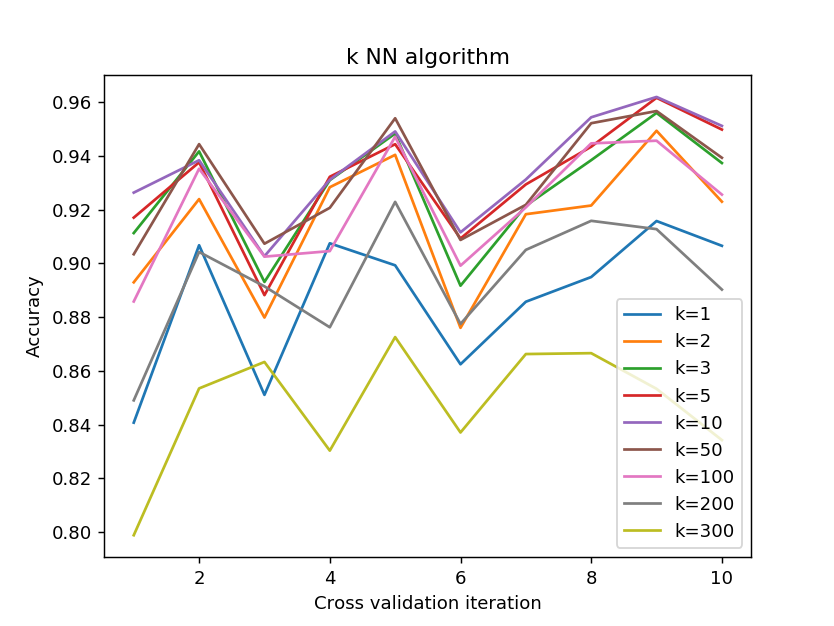

Optimal k value 10
Max mean accuracy 0.9358003298129758


<IPython.core.display.Javascript object>


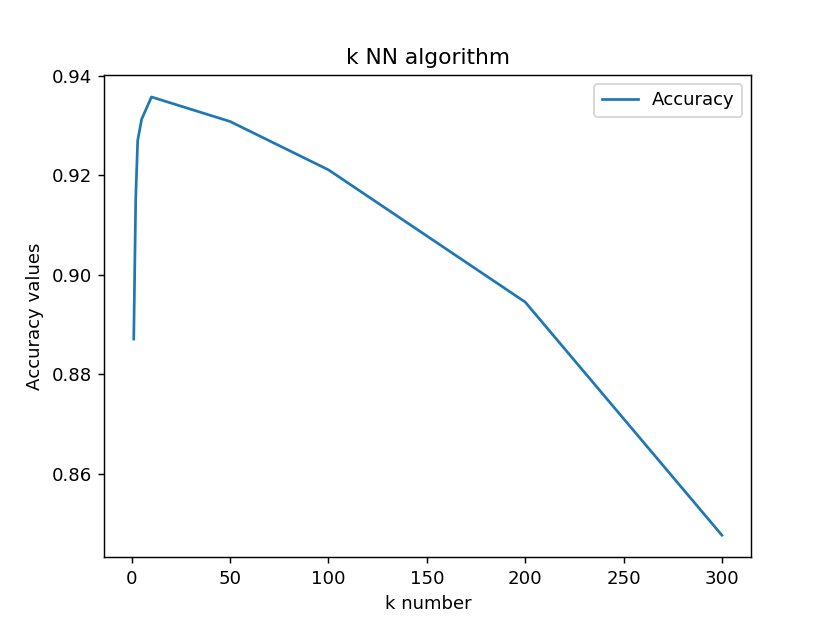

In [6]:
#use knn regression with differen k values
k_values = [1, 2, 3, 5, 10, 50, 100, 200, 300]
mean_accuracy = []
plt.figure()
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    #knn.fit(X_pca, Ytrain)
    scores_knn = cross_val_score(knn, Xtrain, Ytrain, cv=kf,scoring='explained_variance')
    mean_accuracy.append(scores_knn.mean())
    plt.plot(range(1, len(scores_knn)+1),scores_knn, label='k=%s'%k)
plt.ylabel("Accuracy")
plt.xlabel("Cross validation iteration")
plt.title("k NN algorithm")
plt.legend()
plt.show

#find the maximum accuracy and the corresponding k
max_accuracy = max(mean_accuracy)
optimal_k = k_values[mean_accuracy.index(max_accuracy)]
print("Optimal k value", optimal_k)
print("Max mean accuracy", max_accuracy)
plt.figure()
plt.plot(k_values, mean_accuracy, label='Accuracy')
plt.xlabel("k number")
plt.ylabel("Accuracy values")
plt.title("k NN algorithm")
plt.legend()
plt.show()

In [ ]:
#predict the values of using knn regression
